# 1. Описание данных.
Международная e-commerce компания занимается продажей электроники. 

Колонки:
- Customer_care_calls - кол-во контактов клиента со службой поддержки;
- Customer_rating - рейтинг удовлетворенности клиента покупкой;
- Prior_purchases - кол-во предыдущих покупок на сайте;
- Discount_offered - предложенная скидка, в %;
- Weight_in_gms - вес покупки в граммах;
- Warehouse_block - склад;
- Mode_of_Shipment - способ доставки;
- Product_importance - приоритет по доставке (скорость и условия);
- Gender - пол клиента;
- Class - доставлен ли заказ вовремя.

# 2. Цели исследования.
- Посмотреть распределения и выбрать меры центральной тенденции для различных показателей, чтобы иметь представление о текущей ситуации;
- Найти взаимосвязи различных показателей между собой, чтобы понять, как и на какие метрики можно влиять.
- Проверить статистическую значимость различных гипотез.
- Сделать предложения по улучшению работы компании.

# 3. Знакомство с данными.
Для начала посмотрим на данные, их типы, наличие пропусков, при необходимости скорректируем, приведем в более комфортный вид/формат. 

In [1]:
# импортируем необходимые для работы библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import pingouin as pg
from tqdm import tqdm

In [2]:
# выггрузим данные из датасета в датафрейм

path_to_file = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/hXdLQLV7ffRw4Q'

df = pd.read_csv(path_to_file)

In [3]:
# посмотрим на датафрейм

df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Class
0,5,4,2,10,5395,A,Ship,medium,M,1
1,4,3,2,6,5867,F,Ship,medium,F,0
2,3,4,2,2,5957,D,Ship,medium,M,0
3,3,1,2,27,2551,D,Ship,medium,M,1
4,7,5,4,9,1329,B,Ship,medium,M,1


In [4]:
# для более комфортной и быстрой работы приведем названия колонок к snake_case

df.columns = df.columns.str.lower()

In [5]:
# посмотрим на типы, кол-во данных, наличие пропусков

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_care_calls  10998 non-null  int64 
 1   customer_rating      10998 non-null  int64 
 2   prior_purchases      10998 non-null  int64 
 3   discount_offered     10998 non-null  int64 
 4   weight_in_gms        10998 non-null  int64 
 5   warehouse_block      10998 non-null  object
 6   mode_of_shipment     10998 non-null  object
 7   product_importance   10998 non-null  object
 8   gender               10998 non-null  object
 9   class                10998 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 859.3+ KB


Пропущенных значений в датасете нет.

In [6]:
# посмотрим на колонки со строковыми значениями

df[['warehouse_block', 
    'mode_of_shipment', 
    'product_importance', 
    'gender']]

,warehouse_block,mode_of_shipment,product_importance,gender
0,A,Ship,medium,M
1,F,Ship,medium,F
2,D,Ship,medium,M
3,D,Ship,medium,M
4,B,Ship,medium,M
...,...,...,...,...
10993,F,Road,medium,M
10994,D,Flight,low,M
10995,F,Ship,medium,M
10996,F,Flight,medium,M


In [7]:
# для удобства приведем значения этих колонок к нижнему регистру

for i in df[['warehouse_block',
             'mode_of_shipment',
             'gender']]:
    df[i] = df[i].str.lower()

In [8]:
df.head()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,class
0,5,4,2,10,5395,a,ship,medium,m,1
1,4,3,2,6,5867,f,ship,medium,f,0
2,3,4,2,2,5957,d,ship,medium,m,0
3,3,1,2,27,2551,d,ship,medium,m,1
4,7,5,4,9,1329,b,ship,medium,m,1


# 4.1. Распределения и меры центральной тенденции.
Посмотрим на описательные характеристики данных, в т.ч. на разбросы значений, на распределения, определимся с наиболее подходящими мерами центральной тенденции, чтобы грубо описать текущую картину.

In [9]:
# посмотрим на описательные характеристики числовых значений (хотя class здесь по сути является номинативной переменной)

df.describe()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,class
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000
mean,4.054555,2.990453,3.567558,13.373704,3633.873522,0.596745
std,1.141497,1.413635,1.522924,16.206183,1635.382636,0.490573
min,2.000000,1.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,1839.250000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,5049.750000,1.000000
max,7.000000,5.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
# посмотрим на их распределения
# для удобства создадим функцию, которая возвращает таблицу с процентами

def create_hist(column):
    '''Принимает колонку column вида 'df.column', 
    возвращает ее гистограмму.
    '''
    return sns.histplot(column, 
                        color='green', 
                        alpha=0.7, 
                        binwidth=1,
                        discrete=True)

[Text(0.5, 0, 'Контакты со Службой Поддержки'), Text(0, 0.5, 'Заказы')]

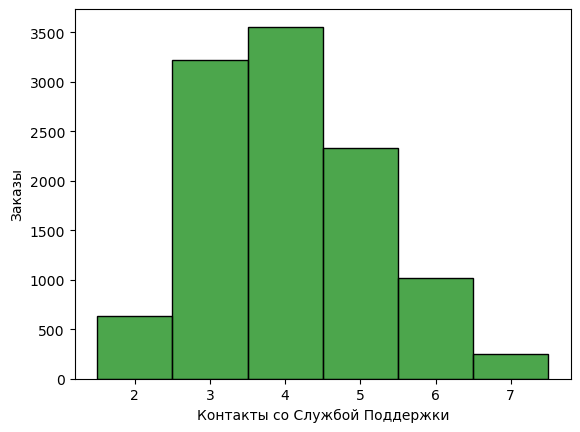

In [11]:
# Customer Care Calls - кол-во контактов со службой поддержки

customer_care_calls_hist = create_hist(df.customer_care_calls)
customer_care_calls_hist.set(xlabel='Контакты со Службой Поддержки', 
                             ylabel='Заказы')

In [12]:
# для удобства создадим функцию, которая возвращает таблицу с процентами

def perc_table(column):
    '''Принимает колонку column вида 'df.column', 
    возвращает таблицу с долями ее значений в процентах.
    '''
    
    return column.value_counts(normalize=True) \
                 .mul(100) \
                 .round(1) \
                 .reset_index() \
                 .rename(columns={'index': column.name, 
                                  column.name: 'percentage'})

In [13]:
perc_table(df.customer_care_calls)

,customer_care_calls,percentage
0,4,32.3
1,3,29.2
2,5,21.2
3,6,9.2
4,2,5.8
5,7,2.2


Распределение похоже на логнормальное, поэтому, выбирая меру центральной тенденции, остановимся на среднем или медиане, при этом у него нет длинных хвостов, выбросов, поэтому они примерно равны.
Будем считать, что в среднем один заказ сопровождается 4мя контактами со службой поддержки. Более 80% заказов - от 4 до 6 контактов.

Мы можем использовать эту информацию, например, при планировании загрузки службы поддержки.

[Text(0.5, 0, 'Рейтинг удовлетворенности'), Text(0, 0.5, 'Заказы')]

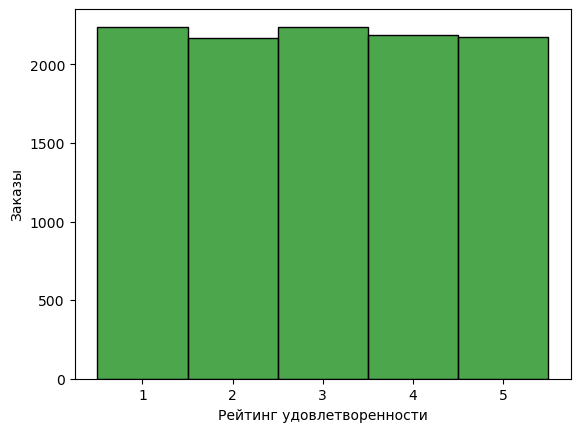

In [14]:
# Customer Rating - рейтинг удовлетворенности заказом

customer_rating_hist = create_hist(df.customer_rating)
customer_rating_hist.set(xlabel='Рейтинг удовлетворенности', 
                         ylabel='Заказы')

In [15]:
perc_table(df.customer_rating)

,customer_rating,percentage
0,3,20.4
1,1,20.3
2,4,19.9
3,5,19.7
4,2,19.7


Распределение похоже на равномерное, поэтому логично, что среднее и медиана примерно равны. Средний рейтинг удовлетворенности заказом среди наших клиентов - 3 балла из 5 возможных.

Очевидно, что данное распределение - это не очень хорошо для нас, нам бы хотелось роста в правой части и низких показателей в левой, а по факту у нас средняя оценка - 'удовлетворительно', но что самое важное - примерно 2/5 наших заказов клиенты не довольны, что может привести к повышению Churn Rate и ухудшению других метрик.

[Text(0.5, 0, 'Предыдущие заказы'), Text(0, 0.5, 'Заказы')]

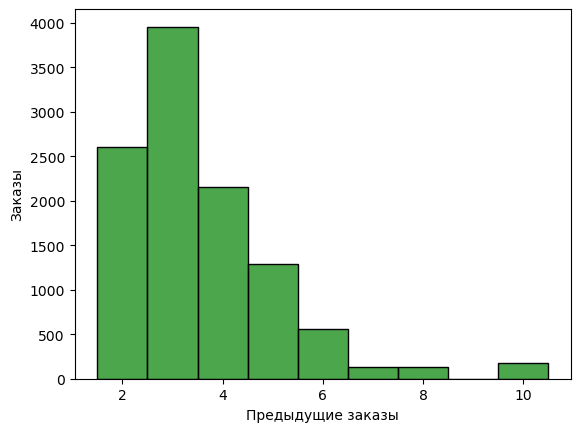

In [16]:
# Prior Purchases - кол-во предыдущих заказов

prior_purchases_hist = create_hist(df.prior_purchases)
prior_purchases_hist.set(xlabel='Предыдущие заказы', 
                         ylabel='Заказы')

In [17]:
perc_table(df.prior_purchases)

,prior_purchases,percentage
0,3,36.0
1,2,23.6
2,4,19.6
3,5,11.7
4,6,5.1
5,10,1.6
6,7,1.2
7,8,1.2


Распределение похоже на логнормальное, справа есть длинный хвост, выбросы, поэтому оптимальной мерой центральной тенденции в данном случае будет медиана, т.е. ориентируемся на то, что на момент заказа у половины наших клиентов сделано ранее более 3,5 заказов, для другой половины - менее, для простоты интерпретации можно взять среднее, которое в данном случае сильно не отличается и равняется 3м заказам. Около 80% заказов являются повторными после 2-4 предыдущих.

В наших данных нет клиентов без предыдущих заказов, все они делают по несколько покупок. Исходя из этого, LTV этих клиентов находится на более высоком уровне, чем в модели, где есть много случайных и новых клиентов, поэтому показатель удовлетворенности, который находится в плачевном состоянии, для нас вдвойне важен, потеря одного клиента обходится нам очень дорого.

[Text(0.5, 0, 'Предложенная скидка'), Text(0, 0.5, 'Заказы')]

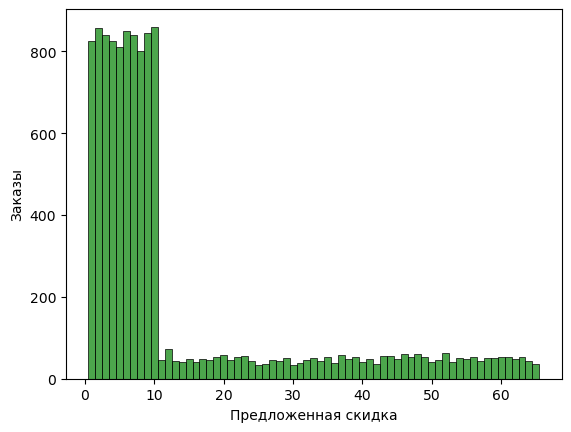

In [18]:
# Discount Offered - предложенная скидка

discount_offered_hist = create_hist(df.discount_offered)
discount_offered_hist.set(xlabel='Предложенная скидка', 
                          ylabel='Заказы')

Это распределение похоже на составное из 2х равномерных. Из-за длины хвоста среднее здесь будет наименее информативно. Можно ориентироваться на медиану равную скидке в размере 7%. Но, на мой взгляд, гораздо интереснее будет выделить два диапазона - 1-10% и 10%+ и посмотреть какие доли имеют эти диапазоны в общем количестве заказов.

In [19]:
round((df[df.discount_offered <= 10].shape[0] / len(df)) * 100, 1)

75.9

По скидкам можно сказать, что на 76% заказов была предложена скидка до 10%, на остальные 24% - от 11% до 65%.

В отрыве от остальной информации это особой пользы не несет, но позже может пригодиться.

[Text(0.5, 0, 'Вес в граммах'), Text(0, 0.5, 'Заказы')]

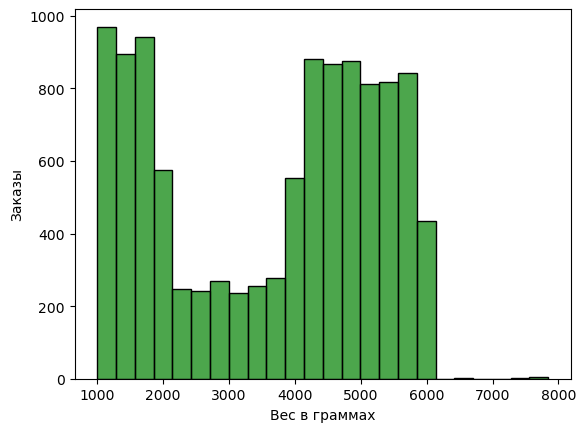

In [20]:
# Weight in Grams - вес в граммах

weight_in_gms_hist = sns.histplot(df.weight_in_gms, 
                                  color='green', 
                                  alpha=0.7)
weight_in_gms_hist.set(xlabel='Вес в граммах', 
                       ylabel='Заказы')

Распределение похоже на бимодальное, здесь среднее или медиана не дадут абсолютно ничего, поэтому выделим 4 диапазона и посчитаем для них доли:
1. До 2 кг;
2. 2-4 кг;
3. 4-6 кг;
4. Более 6 кг.

In [21]:
# создадим отдельную колонку с этими группами

df['weight_groups'] = pd.cut(df.weight_in_gms, [0, 2000, 4000, 6000, float('inf')])

In [22]:
df.weight_groups.value_counts(normalize=True) \
                .mul(100) \
                .round(1)

(4000.0, 6000.0]    54.2
(0.0, 2000.0]       29.5
(2000.0, 4000.0]    16.3
(6000.0, inf]        0.1
Name: weight_groups, dtype: float64

В итоге получаем то, что более половины заказов находится в диапазоне 4-6 кг, около трети до 2 кг, около 15% 2-4 кг и менее 1% более 6 кг.

Мы можем учитывать эту информацию для определения кол-ва сотрудников и техники на складах, а также требований к ним.

Поскольку переменная Class, несмотря на числовые значения, по смыслу является номинативной, на данном этапе нет смысла что-либо рассчитывать за рамками известных уже нам значений: около 60% заказов доставляются вовремя.

In [23]:
# посмотрим на другие номинативные переменные
# Warehouse Block - склад

print(df.warehouse_block.unique())

['a' 'f' 'd' 'b' 'c']


In [24]:
# здесь также создадим функцию для создания countplot

def create_cp(column):
    '''Принимает колонку column вида 'df.column', 
    возвращает ее countplot.
    '''
    
    return sns.countplot(y=column,
                         color='green', 
                         alpha=0.7,
                         order=column.value_counts().index)

[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Склад')]

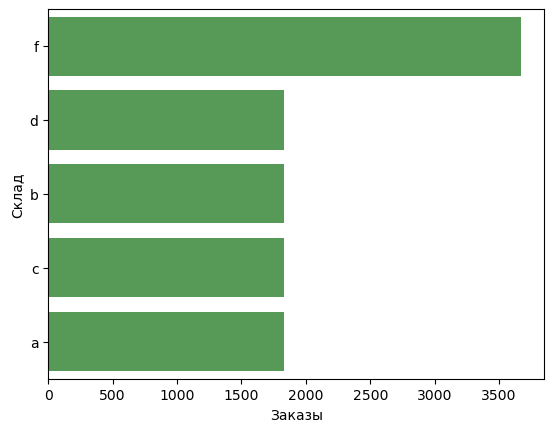

In [25]:
warehouse_block_cp = create_cp(df.warehouse_block)
warehouse_block_cp.set(xlabel='Заказы', 
                       ylabel='Склад')

In [26]:
perc_table(df.warehouse_block)

,warehouse_block,percentage
0,f,33.3
1,d,16.7
2,b,16.7
3,c,16.7
4,a,16.7


Со склада F отправляется примерно в 2 раза больше заказов, чем с любого другого. Все остальные распределены равномерно.

Мы можем учитывать это при оптимизации логистических процессов.

In [27]:
# тип доставки

print(df.mode_of_shipment.unique())

['ship' 'road' 'flight']


[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Тип доставки')]

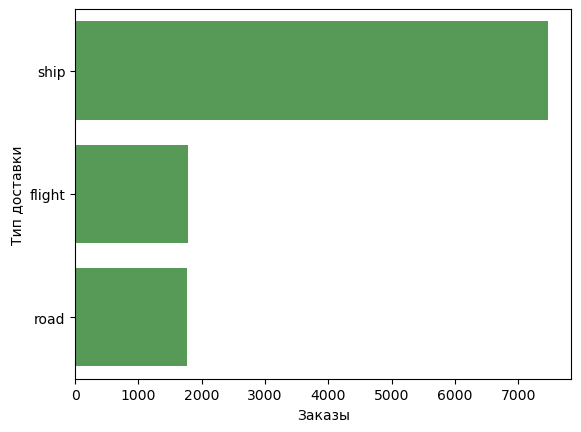

In [28]:
mode_of_shipment_cp = create_cp(df.mode_of_shipment)
mode_of_shipment_cp.set(xlabel='Заказы', 
                        ylabel='Тип доставки')

In [29]:
perc_table(df.mode_of_shipment)

,mode_of_shipment,percentage
0,ship,67.8
1,flight,16.2
2,road,16.0


Около 2/3 доставок происходят по морю. Возможно, это одна из причин того, что мы не доставляем заказы в срок, тк из 3х представленных вариантов этот кажется наиболее долгим и наименее точным по времени.

In [30]:
# приоритеты по доставке

print(df.product_importance.unique())

['medium' 'low' 'high']


[Text(0.5, 0, 'Заказы'), Text(0, 0.5, 'Приоритет по доставке')]

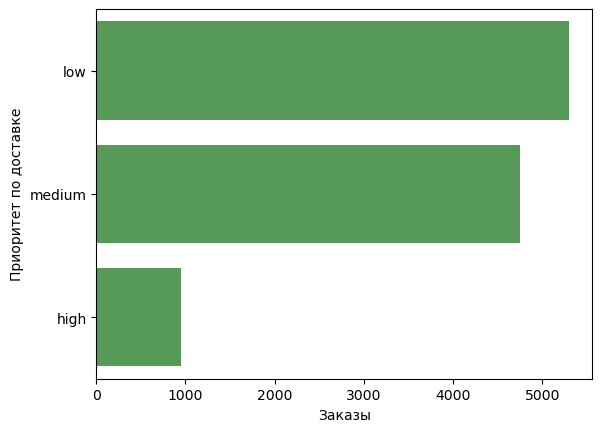

In [31]:
product_importance_cp = create_cp(df.product_importance)
product_importance_cp.set(xlabel='Заказы', 
                          ylabel='Приоритет по доставке')

In [32]:
perc_table(df.product_importance)

,product_importance,percentage
0,low,48.2
1,medium,43.2
2,high,8.6


Более 90% заказов имеет низкий и средний приоритеты по доставке. Возможно, это одна из причин задержек.

In [33]:
# пол клиентов

print(df.gender.unique())

['m' 'f']


In [34]:
perc_table(df.gender)

,gender,percentage
0,f,50.4
1,m,49.6


Кол-во заказов от мужчин и от женщин примерно равны.

# Распределения и меры центральной тенденции. Резюме.

- в среднем один заказ сопровождается 4мя контактами со службой поддержки. Более 80% заказов - от 4 до 6 контактов.
- средний рейтинг удовлетворенности заказом среди наших клиентов - 3 балла из 5 возможных.
- около 80% заказов являются повторными после 2-4 предыдущих.
- на 76% заказов была предложена скидка до 10%, на остальные 24% - от 11% до 65%.
- более половины заказов находится в диапазоне 4-6 кг, около трети до 2 кг, около 15% 2-4 кг и менее 1% более 6 кг.
- около 60% заказов доставляются вовремя
- со склада F отправляется примерно в 2 раза больше заказов, чем с любого другого. Все остальные распределены равномерно.
- около 2/3 доставок происходят по морю.
- более 90% заказов имеет низкий и средний приоритеты по доставке.
- кол-во заказов от мужчин и от женщин примерно равны.

# 4.3. Поиск взаимосвязей.
Выдвинем ряд идей о возможных взаимосвязях, посмотрим на цифры и графики, при необходимости проверим различия статистически.

# 4.3.1. Рейтинг удовлетворенности.
Посмотрим на влияние различных признаков на рейтинг.

Кол-во контактов с СП может влиять положительно на удовлетворенность, тк служба оказывает помощь, решает проблемы, иногда успокаивает, дарит подарки и т.п., но в то же время может быть и обратный эффект - люди в-основном обращаются за помощью, когда у них возникают проблемы, а это уже негативный оттенок. 

Если бы у нас была информация о входящих/исходящих звонках, о времени относительно выполнения заказа - можно было бы сделать более точное предположение.

In [35]:
# создадим функцию, которая группирует значения и выводит средний рейтинг

def avg_rating(column):
    '''Принимает колонку column вида 'df.column', 
    возвращает таблицу со средним рейтингом.
    '''
    return df.groupby(column, as_index=False) \
             .customer_rating.mean() \
             .round(2)

In [36]:
# и функцию, которая будет возвращать барплот

def create_bp(data):
    '''Принимает датафрейм data, возвращает барчарт'''
    return sns.barplot(x=data[data.columns[0]], 
                       y=data[data.columns[1]],
                       color='green', 
                       alpha=0.7)

In [37]:
# посмотрим на средние значения рейтинга для разного количества звонков

calls_rating = avg_rating(df.customer_care_calls)

In [38]:
calls_rating

,customer_care_calls,customer_rating
0,2,3.02
1,3,2.96
2,4,3.00
3,5,2.97
4,6,3.08
5,7,3.00


[Text(0.5, 0, 'Контакты со Службой Поддержки'),
 Text(0, 0.5, 'Средний рейтинг заказа')]

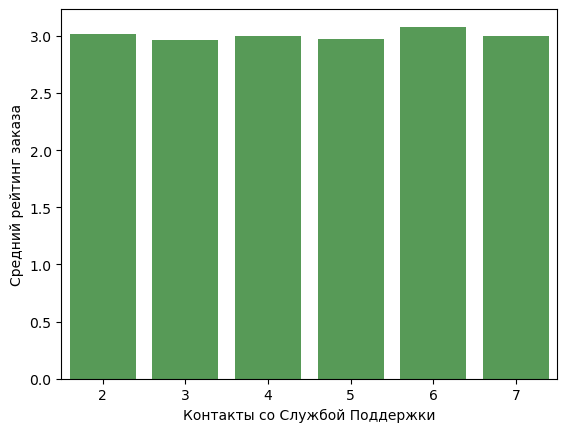

In [39]:
calls_rating_bp = create_bp(calls_rating)
calls_rating_bp.set(xlabel='Контакты со Службой Поддержки',
                    ylabel='Средний рейтинг заказа')

Различия между группами минимальны, при этом какой-то направленности не наблюдается.

Кол-во предыдущих покупок может положительно влиять на рейтинг, тк кажется, что чем больше покупок совершил клиент, тем больше вероятность, что в-целом он доволен нашим сервисом, он хорошо с ним знаком и его все устраивает.

In [40]:
# посмотрим на средние значения рейтинга для разного количества предыдущих покупок

purchases_rating = avg_rating(df.prior_purchases)

In [41]:
purchases_rating

,prior_purchases,customer_rating
0,2,2.96
1,3,3.00
2,4,3.03
3,5,2.94
4,6,3.02
5,7,2.87
6,8,3.04
7,10,3.20


[Text(0.5, 0, 'Предыдущие покупки'), Text(0, 0.5, 'Средний рейтинг заказа')]

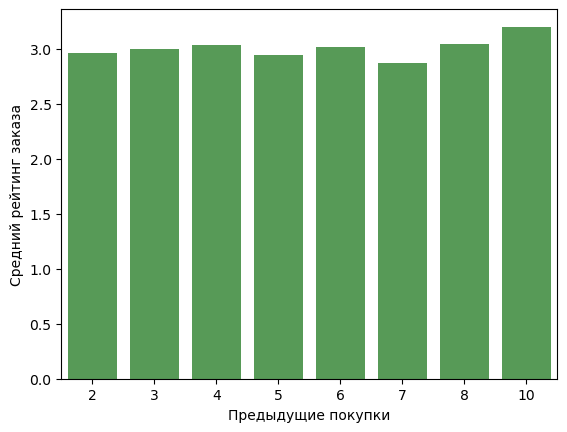

In [42]:
purchases_rating_bp = create_bp(purchases_rating)
purchases_rating_bp.set(xlabel='Предыдущие покупки',
                        ylabel='Средний рейтинг заказа')

Какого-то устойчивого тренда не наблюдается, да у 10 покупок средний рейтинг самый высокий, но выборка относительно других значений минимальна, различия небольшие, а для всех остальных значений распределение похоже на равномерное.

Проведем тесты, чтобы проверить, насколько эти отличия статистически значимы.

Нам необходимо сравнить средние 2х выборок. В классической теории первое, что для этого отлично подходит - T-тест или его непараметрический аналог - U-тест Манна-Уитни.

Проверим, выполняются ли требования для проведения Т-теста:
1. Равенство выборок. Мы знаем, что они неравны, поэтому будем использовать T-тест Уэлча.
2. Равенство размеров выборок. Можно было бы провести тест Левена, но для T-теста Уэлча отсутствие гомоскедастичности - не проблема.
2. Нормальность. Проведем тесты Д'Агустино-Пирсона (т.к. Шапиро-Уилк плохо работает для выборок более 5000 строк), построим qqplot'ы.

In [43]:
# выделим 2 группы значений

purchases_descent = df[df.prior_purchases < 10].customer_rating
purchases_top = df[df.prior_purchases == 10].customer_rating

[Text(0.5, 0, 'Рейтинг заказа'), Text(0, 0.5, 'Кол-во оценок')]

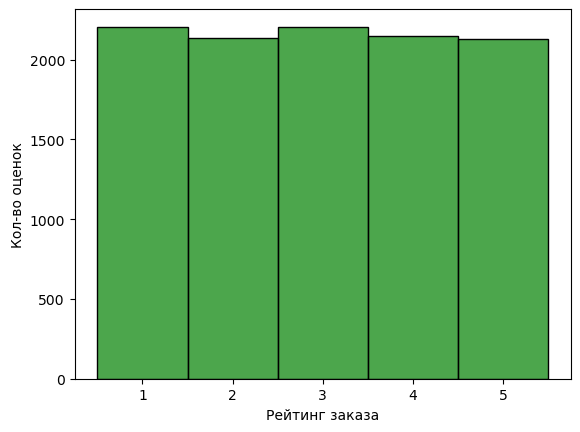

In [44]:
# посмотрим на распределения выборок

purchases_descent_hist = create_hist(purchases_descent)
purchases_descent_hist.set(xlabel='Рейтинг заказа',
                           ylabel='Кол-во оценок')

[Text(0.5, 0, 'Рейтинг заказа'), Text(0, 0.5, 'Кол-во оценок')]

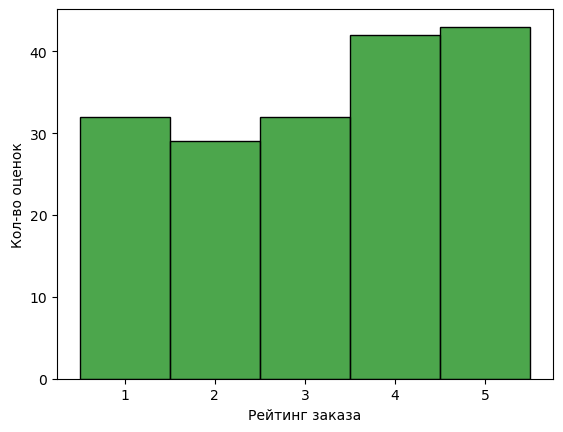

In [45]:
purchases_top_hist = create_hist(purchases_top)
purchases_top_hist.set(xlabel='Рейтинг заказа',
                       ylabel='Кол-во оценок')

Визуально распределения не похожи на нормальные. но все же проведем все запланированные проверки.

Проведем тест Д'Агустино-Пирсона, где Н0 говорит о том, что выборка взята из нормального распределения, Н1 - что выборка взята не из нормального распределения.

In [46]:
# тест Д'Агустино-Пирсона

ss.normaltest(purchases_descent)

NormaltestResult(statistic=34226.370351165686, pvalue=0.0)

In [47]:
ss.normaltest(purchases_top)

NormaltestResult(statistic=132.033935665514, pvalue=2.134003651684199e-29)

При p-value < 0.05 мы отклоняем нулевую гипотезу, о том, что данные выборки взяты из нормальных распределений.

Иногда тесты на нормальность ошибочно не признают выборки нормальными, поэтому лучше дополнительно смотреть qqplot и уровень корреляции на нем.

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

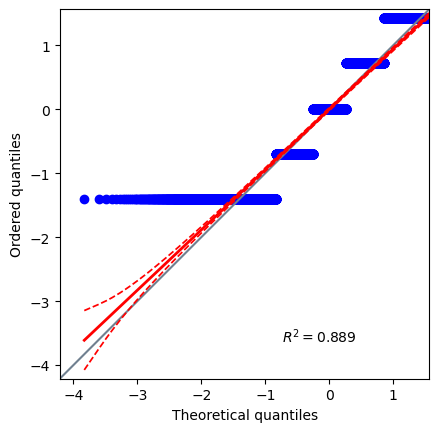

In [48]:
# построим qqplot (более информативно в pingouin)

pg.qqplot(purchases_descent)

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

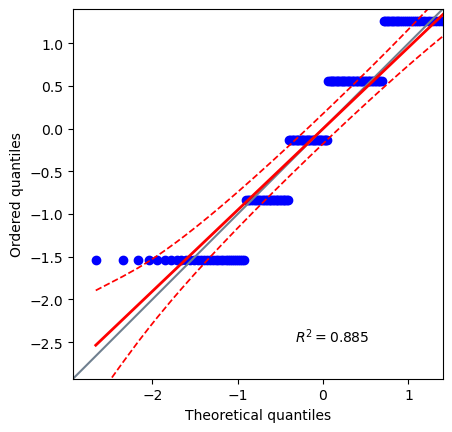

In [49]:
pg.qqplot(purchases_top)

In [50]:
np.sqrt(0.889)

0.9428679653058534

In [51]:
np.sqrt(0.885)

0.9407443861113389

Кроме визуального расхождения, значения коффициента детерминации слишком низкие, коэффициенты корреляции около 0.94, что ниже допустимого значения 0.95.

Как итог, мы не можем утверждать, что данные распределения нормальные, поэтому проводить T-тест, исходя из классической теории здесь будет неправильно, но есть и другая позиция, говорящая нам о том, что для больших выборок (в отдельных источниках указывается значение в 30 наблюдений) нормальность не является обязательным требоваванием, поэтому просимулируем методом Монте-Карло оба варианта, а также бутстрэп, чтобы определить, какой же все таки тест здесь будет смотреться лучше.

In [52]:
# создадим генераторы наших распределений

def top_dist(size):
    '''Принимает размер необходимой выборки, возвращает выборку соответствующего 
    размера, сгенерированную из распределения, аналогичного распределению заказов 
    с 10 предыдущими покупками.
    '''
    
    # создадим Series с оценками, соберем для Scipy значения и их частоту    
    purchases_top_dist = purchases_top.value_counts(normalize=True) \
                                      .reset_index()
    xk_top = purchases_top_dist['index'].to_list()
    pk_top = purchases_top_dist.customer_rating.to_list() 
    
    # создадим распределение    
    top = ss.rv_discrete(name='top', values=(xk_top, pk_top))
    
    # вернем сгенерированное заданного размера    
    return top.rvs(size=size)

In [53]:
def descent_dist(size):
    '''Принимает размер необходимой выборки, возвращает выборку соответствующего 
    размера, сгенерированную из распределения, аналогичного распределению заказов 
    менее, чем с 10 предыдущими покупками.
    '''
    
    purchases_descent_dist = purchases_descent.value_counts(normalize=True) \
                                              .reset_index()
    xk_descent = purchases_descent_dist['index'].to_list()
    pk_descent = purchases_descent_dist.customer_rating.to_list()
    
    descent = ss.rv_discrete(name='descent', values=(xk_descent, pk_descent))
    
    return descent.rvs(size=size)

In [54]:
# также создадим генератор распределения с 10 покупками, 
# сместив его среднее на уровень остальных, чтобы проверить ошибки 1го рода

mean_diff = purchases_top.mean() - purchases_descent.mean()

def top_dist_equal(size):
    '''Принимает размер необходимой выборки, возвращает выборку соответствующего 
    размера, сгенерированную из распределения, аналогичного распределению заказов 
    с 10 предыдущими покупками, со смещенным средним, равным среднему заказов
    с менее, чем 10 предыдущими покупками.'''
    
    purchases_top_dist = purchases_top.value_counts(normalize=True) \
                                      .reset_index()
    
    # Смещаем все значения Series на разницу между средними    
    xk_top = (purchases_top_dist['index'] - mean_diff).to_list()
    pk_top = purchases_top_dist.customer_rating.to_list() 
    
    top = ss.rv_discrete(name='top', values=(xk_top, pk_top))
    
    return top.rvs(size=size)

Начнем с Т-теста Уэлча, где Н0 говорит об отсутствии отличий между средними, а Н1 о наличии статистически значимых отличий.

In [55]:
ss.ttest_ind(purchases_descent, purchases_top, equal_var=False)

Ttest_indResult(statistic=-1.9340192107935696, pvalue=0.05465589316707659)

In [56]:
# Мощность можно проверить с помощью Scipy, предварительно рассчитав d Коэна

d = (purchases_top.mean() - purchases_descent.mean()) / \
    np.sqrt((np.std(purchases_top) ** 2 + np.std(purchases_descent) ** 2) / 2)

In [57]:
pg.power_ttest2n(10820, 178, d=d, alpha=0.05)

0.4962870013469116

In [58]:
top_len = len(purchases_top)

In [59]:
descent_len = len(purchases_descent)

In [60]:
# с помощью Монте-Карло проверим процент ошибок 1го рода

tt_total = []

n = 1000

for _ in tqdm(range(n)):
    
    # Cгенерируем 2 распределения    
    top_d = top_dist_equal(top_len)
    descent_d = descent_dist(descent_len) 
    
    # Проведем тест    
    result = ss.ttest_ind(top_d, descent_d, equal_var=False)[1] < 0.05
    
    # Сохраним результаты     
    tt_total.append(result)

# Выведем долю тестов, с ошибкой 1го рода
print(sum(tt_total) / n)

100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 112.16it/s]

0.06


При p-value > 0.05 у нас нет оснований для того, чтобы отвергнуть нулевую гипотезу.
Т-тест показывает приемлемый процент ошибок 1го рода, но мощность (т.е. кол-во ошибок второго рода) находится на низком уровне - в районе 50% при стандартном допустимом значении в 80%, т.е. в нашей ситуации вероятность того, что на самом деле различия есть - около 50%. На результаты такого качества полагаться мы не можем.

Проведем U-тест Манна-Уитни, который сравнивает средние ранги 2х выборок, где Н0 говорит об отсутствии статистически значимых различий между ними, а Н1 - о наличии.

In [61]:
# проведем U-тест Манна-Уитни в Pingouin, тк там есть CLES

pg.mwu(purchases_descent, purchases_top)

,U-val,alternative,p-val,RBC,CLES
MWU,882187.0,two-sided,0.049693,0.083899,0.458051


In [62]:
# Проверим кол-во ошибок в тесте, используем Scipy, тк он работает быстрее
# Мощность

mw_total_1 = []

n = 1000

for _ in tqdm(range(n)):
    
    top_d = top_dist(top_len)
    descent_d = descent_dist(descent_len)  
    
    result = ss.mannwhitneyu(top_d, descent_d)[1] < 0.05
    
    mw_total_1.append(result)

print(sum(mw_total_1) / n)

100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.60it/s]

0.505


In [63]:
# Тендцения ошибаться

mw_total_2 = []

n = 1000

for _ in tqdm(range(n)):
    
    top_d = top_dist_equal(top_len)
    descent_d = descent_dist(descent_len)  
    
    result = ss.mannwhitneyu(top_d, descent_d)[1] < 0.05
    
    mw_total_2.append(result)

print(sum(mw_total_2) / n)

100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.67it/s]

0.783


Поскольку p-value находится в районе 0.05, а common language effect size не так далеко от 50%, здесь ситуация пограничная, но и мощность и тенденция к ошибкам 1го рода находятся на неприемлемых уровнях.

Посмотрим на бутстрэп, где Н0 - статистически значимых различий между средними нет, Н1 - есть.

In [64]:
# Бутстрэп

pg.compute_bootci(purchases_top, 
                  purchases_descent, 
                  n_boot=10000, 
                  func=lambda x, y: np.mean(x) - np.mean(y))

array([-0.  ,  0.42])

In [65]:
# Мощность

bs_total_1 = []

n = 1

for _ in tqdm(range(n)):
    
    top_d = top_dist(top_len)
    descent_d = descent_dist(descent_len) 
    
    bs = pg.compute_bootci(top_d, descent_d, 
                           n_boot=10000, 
                           func=lambda x, y: np.mean(x) - np.mean(y))
    
    result = np.sign(bs[0]) == np.sign(bs[1])
    
    bs_total_1.append(result)

print(sum(bs_total_1) / n)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.53s/it]

1.0


In [66]:
# Тенденция ошибаться

bs_total_2 = []

n = 1

for _ in tqdm(range(n)):
    
    top_d = top_dist_equal(top_len)
    descent_d = descent_dist(descent_len) 
    
    bs = pg.compute_bootci(top_d, descent_d, 
                           n_boot=10000, 
                           func=lambda x, y: np.mean(x) - np.mean(y))
    
    result = np.sign(bs[0]) == np.sign(bs[1])
    
    bs_total_2.append(result)

print(sum(bs_total_2) / n)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.28s/it]

0.0


Бутстрэп показал лучшие результаты, но мощность все равно не дотягивает до стандартного значения в 80%.

Поскольку на MDE мы в данном случае повлиять не можем, он такой, какой есть, то чтобы получить более качественные тесты нужно подождать, пока соберется достаточная выборка в группе с заказами с 10 предыдущими покупками, туда же можно будет добавить и большее кол-во покупок.

Рассчитаем необходимое минимальное количество, чтобы получить тесты с качественными результатами.

In [67]:
# Создадим листы для сбора результатов

n_list = []
tt1 = []
tt2 = []
mw1 = []
mw2 = []

# Зададим кол-во итераций
n = 1000

for i in tqdm([top_len, 250, 300, 350, 400, 450, 500]):
    
    # Создадим аналогичные локальные листы    
    tt_total_1 = []
    tt_total_2 = []
    mw_total_1 = []
    mw_total_2 = []
    
    for _ in range(n):
        
        # Сгенерируем выборки заданного размера
        top_d = top_dist(i)
        top_d_equal = top_dist_equal(i)
        descent_d = descent_dist(descent_len)
        
        # Сохраним результаты тестов для выборок
        t_result_1 = ss.ttest_ind(top_d, descent_d, equal_var=False)[1] < 0.05
        t_result_2 = ss.ttest_ind(top_d_equal, descent_d, equal_var=False)[1] < 0.05
        mw_result_1 = ss.mannwhitneyu(top_d, descent_d)[1] < 0.05
        mw_result_2 = ss.mannwhitneyu(top_d_equal, descent_d)[1] < 0.05
        
        # Запишем результаты в листы
        tt_total_1.append(t_result_1)
        tt_total_2.append(t_result_2)
        mw_total_1.append(mw_result_1)
        mw_total_2.append(mw_result_2)
    
    # Посчитаем долю, т.е. мощность и тенденцию к ошибкам
    n_list.append(i)
    tt1.append(sum(tt_total_1) / n)
    tt2.append(sum(tt_total_2) / n)
    mw1.append(sum(mw_total_1) / n)
    mw2.append(sum(mw_total_2) / n)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:41<00:00, 31.59s/it]


In [68]:
# Подготовим результаты для визуализации

size_needed = pd.DataFrame(index=n_list, 
                           data={'tt1': tt1, 
                                 'tt2': tt2, 
                                 'mw1': mw1, 
                                 'mw2': mw2}).stack() \
                                             .reset_index()

In [69]:
size_needed.columns = ['n', 'test', 'result']

[Text(0.5, 0, 'Размер выборки'), Text(0, 0.5, 'Мощность теста')]

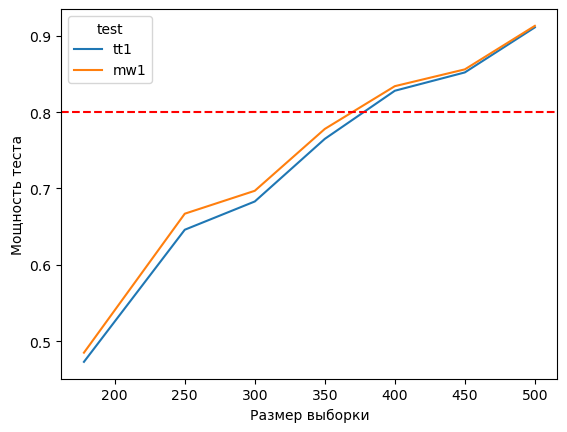

In [70]:
# Посмотрим на мощность

power_lp = sns.lineplot(data=size_needed[(size_needed.test == 'tt1') 
                                      | (size_needed.test == 'mw1')], 
                     x='n', 
                     y='result', 
                     hue='test')
power_lp.axhline(0.8, ls='--', color='red')
power_lp.set(xlabel='Размер выборки',
             ylabel='Мощность теста')

[Text(0.5, 0, 'Размер выборки'), Text(0, 0.5, 'Вероятность ошибки')]

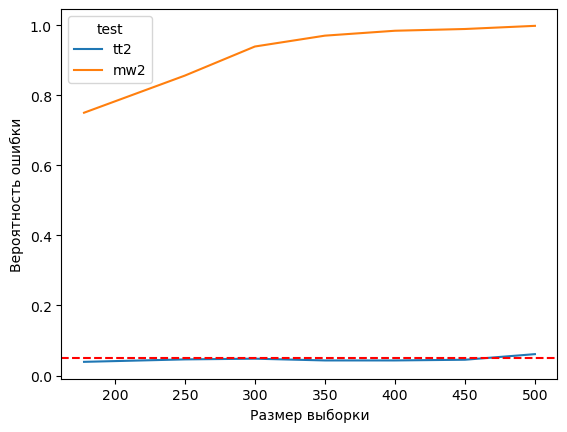

In [71]:
# Посмотрим на тенденцию ошибаться

mistake_lp = sns.lineplot(data=size_needed[(size_needed.test == 'tt2') 
                                      | (size_needed.test == 'mw2')], 
                     x='n', 
                     y='result', 
                     hue='test')
mistake_lp.axhline(0.05, ls='--', color='red')
mistake_lp.set(xlabel='Размер выборки',
               ylabel='Вероятность ошибки')

Очевидно, что тест Манна-Уитни для этого набора данных не подходит, судя по всему, из-за большого кол-ва повторных значений. Для Т-теста нужна выборка 500 человек, чтобы и мощность и тенденция к ошибке находились на приемлемом уровне.

Посмотрим на необходимые значения для бутстрэпа.

In [72]:
n_list_bs = []
bs1 = []
bs2 = []

n = 1

for i in tqdm([top_len, 300, 400, 500]):
    bs_total_1 = []
    bs_total_2 = []
    for _ in range(n):
        top_d = top_dist(i)
        top_d_equal = top_dist_equal(i)
        descent_d = descent_dist(descent_len)
        
        bs_1 = pg.compute_bootci(top_d, descent_d, 
                                 n_boot=10000, 
                                 func=lambda x, y: np.mean(x) - np.mean(y))    
        bs_2 = pg.compute_bootci(top_d_equal, descent_d, 
                                 n_boot=10000, 
                                 func=lambda x, y: np.mean(x) - np.mean(y))
        
        result_1 = np.sign(bs_1[0]) == np.sign(bs_1[1])
        result_2 = np.sign(bs_2[0]) == np.sign(bs_2[1])
        
        bs_total_1.append(result_1)
        bs_total_2.append(result_2)
    
    n_list_bs.append(i)
    bs1.append(sum(bs_total_1) / n)
    bs2.append(sum(bs_total_2) / n)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:41<00:00, 10.43s/it]


In [73]:
# Подготовим данные для визуализации

bs_size = pd.DataFrame(index=n_list_bs, 
                       data={'bs1': bs1, 
                             'bs2': bs2}).stack() \
                                         .reset_index()

In [74]:
bs_size.columns = ['n', 'test', 'result']

In [75]:
bs_size

,n,test,result
0,178,bs1,0.0
1,178,bs2,0.0
2,300,bs1,1.0
3,300,bs2,0.0
4,400,bs1,0.0
5,400,bs2,0.0
6,500,bs1,1.0
7,500,bs2,0.0


[Text(0.5, 0, 'Размер выборки'), Text(0, 0.5, 'Вероятность')]

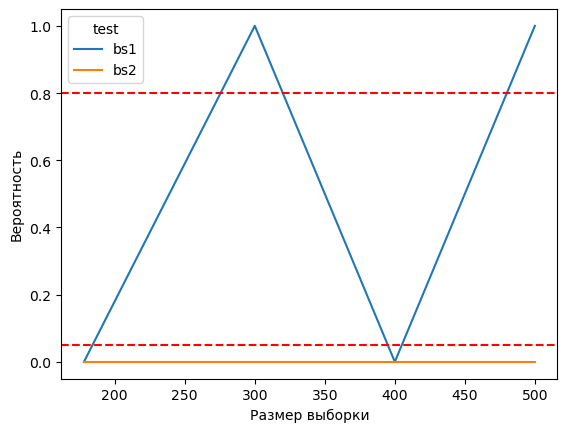

In [76]:
# Посмотрим на кол-во ошибок 1го и 2го рода

lp = sns.lineplot(data=bs_size, 
                  x='n', 
                  y='result', 
                  hue='test')
lp.axhline(0.8, ls='--', color='red')
lp.axhline(0.05, ls='--', color='red')
lp.set(xlabel='Размер выборки',
       ylabel='Вероятность')

ВЫВОДЫ ПО БОЛЬШИМ ВЫБОРКАМ!!!

Размер скидки по логике должен положительно влиять на удовлетворенность заказом, тк выгодная покупка это всегда приятно.

In [77]:
# посмотрим на средние значения рейтинга для разных размеров скидок

discount_rating = avg_rating(df.discount_offered)

In [78]:
discount_rating.head()

,discount_offered,customer_rating
0,1,2.99
1,2,3.05
2,3,2.96
3,4,2.92
4,5,3.00


Text(0, 0, '')

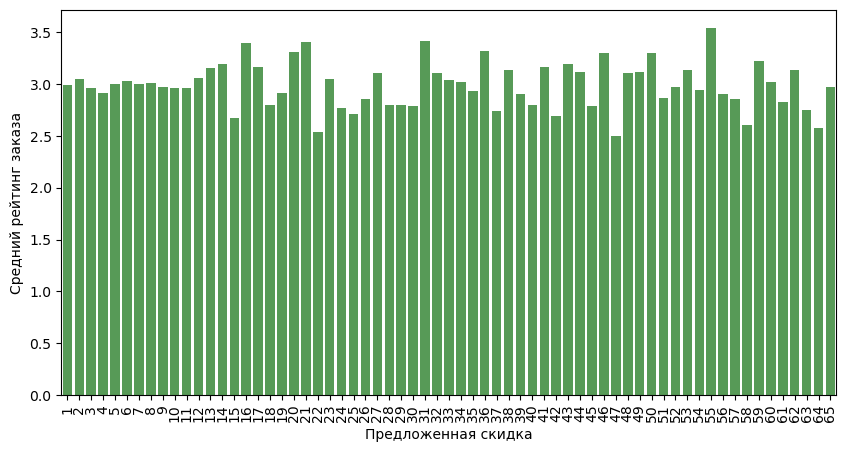

In [79]:
plt.figure(figsize=(10,5))
discount_rating_bp = create_bp(discount_rating)
discount_rating_bp.set(xlabel='Предложенная скидка',
                       ylabel='Средний рейтинг заказа')
discount_rating_bp.set_xticklabels(discount_rating_bp.get_xticklabels(), rotation=90)
discount_rating_bp.text(0, 0, '')

Никакой тенденции на графике не видно, единственная разница - до размера скидки в 10% меньше разброс, что объясняется значительно большим размером выборок для этих значений, средняя при этом сохраняется, убедимся в этом сравнив средние двух групп, которые мы уже выделяли для скидок - до 10% и более 10%.

In [80]:
round(df[df.discount_offered <= 10].customer_rating.mean(), 2)

2.99

In [81]:
round(df[df.discount_offered > 10].customer_rating.mean(), 2)

2.99

Средний реитинг у обеих групп одинаковый, поэтому идею о влиянии скидки на уровень оценки удовлетворенности похоже не влияет.

Вес посылки может влиять на общий настрой клиента в формате - чем выше вес, тем больше он рад, что ему доставили заказ, и не пришлось тащить его на себе.

In [82]:
# посмотрим на средние значения рейтинга для разного веса посылок

weights_rating = avg_rating(df.weight_groups)

In [83]:
weights_rating

,weight_groups,customer_rating
0,"(0.0, 2000.0]",2.98
1,"(2000.0, 4000.0]",3.00
2,"(4000.0, 6000.0]",2.99
3,"(6000.0, inf]",2.75


[Text(0.5, 0, 'Вес в граммах'), Text(0, 0.5, 'Средний рейтинг заказа')]

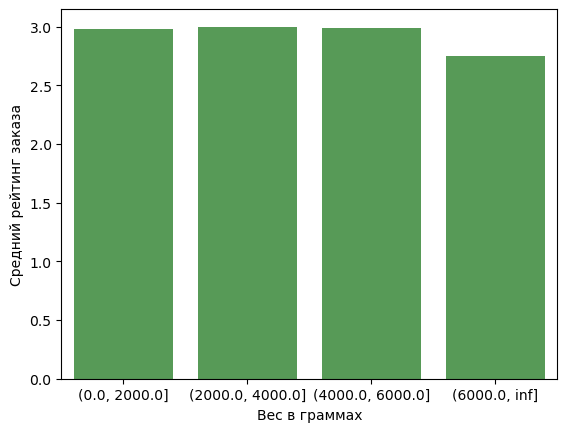

In [84]:
weights_rating_bp = create_bp(weights_rating)
weights_rating_bp.set(xlabel='Вес в граммах',
                      ylabel='Средний рейтинг заказа')

Мы видим обратную картину - чем больше вес посылки, тем ниже оценка. Наша идея не подтверждается, а искать оправдание цифрам не совсем верно. Есть варинт, что вес влияет на метрику, которая влияет на рейтинг, например, мелкие заказы чаще доставляются вовремя, а своевременность доставки влияет на рейтинг, но пока мы этого не знаем. Подобные корреляции мы поищем позже, когда и если найдем факторы влияющие на рейтинг.

На разных складах могут по-разному упаковывать товары, обращаться с ними, находить товары с разной скоростью и т.д. То есть существует множество мелких факторов, которые могут повлиять на то, как быстро и в каком виде товар будет доставлен клиенту.

In [85]:
# посмотрим, у каких складов самый высокий рейтинг

warehouse_rating = avg_rating(df.warehouse_block).sort_values('customer_rating', ascending=False)

In [86]:
warehouse_rating

,warehouse_block,customer_rating
3,d,3.02
4,f,3.00
2,c,2.99
1,b,2.98
0,a,2.96


[Text(0.5, 0, 'Средний рейтинг заказа'), Text(0, 0.5, 'Склад')]

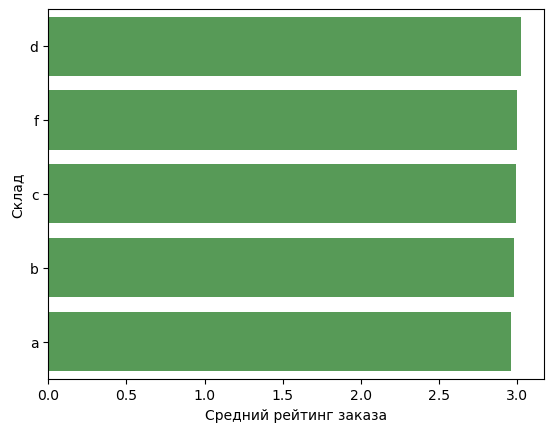

In [87]:
warehouse_rating_bp = sns.barplot(x=warehouse_rating.customer_rating, 
                                  y=warehouse_rating.warehouse_block,
                                  color='green', 
                                  alpha=0.7)
warehouse_rating_bp.set(xlabel='Средний рейтинг заказа',
                        ylabel='Склад')

Теперь осталось проверить насколько значимыми являются эти различия.

Проведем однофакторный ANOVA. 
Для этого необходимо проверить наши выборки на гомоскедастичность при помощи теста Левена, где Н0 говорит о том, что выборки взяты из ГС с одинаковой дисперсией, а Н1 - что с разной.
Нормальность распределений здесь не является обязательной, тк выборки достаточно больших размеров.

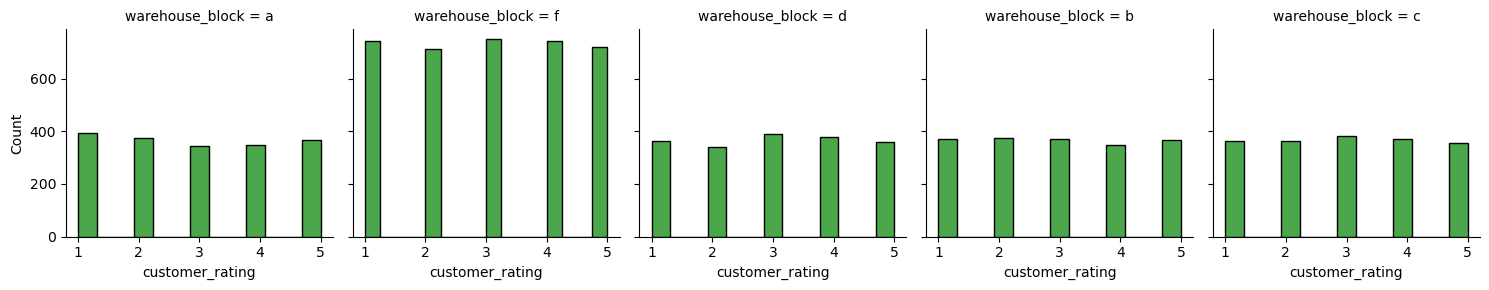

In [88]:
# для начала посмотрим на распределения, 
# чтобы выбрать подходящую функцию в тесте Левена

g = sns.FacetGrid(df, col="warehouse_block")
g.map(sns.histplot, "customer_rating", color='green', alpha=0.7)

Распределения похожи на равномерные, поэтому в качестве функции для теста выберем среднее.

In [89]:
# тест Левена

a = df[df.warehouse_block == 'a'].customer_rating
b = df[df.warehouse_block == 'b'].customer_rating
c = df[df.warehouse_block == 'c'].customer_rating
d = df[df.warehouse_block == 'd'].customer_rating
f = df[df.warehouse_block == 'f'].customer_rating

ss.levene(a, b, c, d, f, center='mean')

LeveneResult(statistic=1.3845436921869758, pvalue=0.23647158932074816)

При p-value > 0.05 у нас нет оснований, чтобы отвергнуть нулевую гипотезу. 

Можно проводить однофакторный Anova, где Н0 говорит о том, что средние в выборках не отличаются, Н1 - что есть статистически значимые отличия.

In [90]:
# Однофакторный ANOVA

ss.f_oneway(a, b, c, d, f)

F_onewayResult(statistic=0.47658916735432144, pvalue=0.7529756767708896)

При p-value > 0.05 у нас нет оснований, чтобы отвергнуть нулевую гипотезу, т.е. статичестически значимых отличий между выборками обнаружить не удалось.

In [91]:
# Проверим мощность теста

results = []
n = 1000

a_len = len(a)
b_len = len(b)
c_len = len(c)
d_len = len(d)
f_len = len(f)

for _ in tqdm(range(n)):
    
    # Сгенерируем 5 распределений
    a_m = a.value_counts(normalize=True) \
           .reset_index()
    xk_a = a_m['index'].to_list()
    pk_a = a_m.customer_rating.to_list()    
    a_d = ss.rv_discrete(name='a_d', values=(xk_a, pk_a))
    a_s = a_d.rvs(size=a_len)

    b_m = b.value_counts(normalize=True) \
         .reset_index()
    xk_b = b_m['index'].to_list()
    pk_b = b_m.customer_rating.to_list()    
    b_d = ss.rv_discrete(name='b_d', values=(xk_b, pk_b))
    b_s = b_d.rvs(size=b_len)
    
    c_m = c.value_counts(normalize=True) \
         .reset_index()
    xk_c = c_m['index'].to_list()
    pk_c = c_m.customer_rating.to_list()    
    c_d = ss.rv_discrete(name='c_d', values=(xk_c, pk_c))
    c_s = c_d.rvs(size=c_len)
    
    d_m = d.value_counts(normalize=True) \
         .reset_index()
    xk_d = d_m['index'].to_list()
    pk_d = d_m.customer_rating.to_list()    
    d_d = ss.rv_discrete(name='d_d', values=(xk_d, pk_d))
    d_s = d_d.rvs(size=d_len)
    
    f_m = f.value_counts(normalize=True) \
         .reset_index()
    xk_f = f_m['index'].to_list()
    pk_f = f_m.customer_rating.to_list()    
    f_d = ss.rv_discrete(name='f_d', values=(xk_f, pk_f))
    f_s = f_d.rvs(size=f_len)
    
    result = ss.f_oneway(a_s, b_s, c_s, d_s, f_s).pvalue < 0.05
    results.append(result)

print(sum(results) / n)

100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.44it/s]

0.179


Мощность теста очень низкая, очевидно, что при наличии выборок приличных размеров дело в MDE. 

Если бизнес находится на ранней стадии и/или объемы небольшие, то лучше искать более очевидные вещи. Если же это развитый проект, который находится на стадии масштабирования и изменение любой метрики на 0,01 оказывает мощный эффект на прибыль в абсолютных значениях за счет больших объемов, то нужно копать дальше и брать бОльшие выборки, либо использовать более хитрые способы тестирования. 

В рамках данного проекта чуть раньше мы уже считали тенденцию к ошибкам и необходимые размеры выборок для пары рейтинг - кол-во предыдущих покупок, чтобы выйти на приемлемые уровни ошибок 1го и 2го рода, но в данном случае я не вижу смысла это дублировать, разница в рейтингах минимальна и эффект влияния рейтинга на экономику продукта нам неизвестен.

Способ доставки может влиять на скорость доставки и на то, в каком виде товар приехал, что в свою очередь может влиять на оценку.

In [92]:
# посмотрим, у каких способов доставки самый высокий рейтинг

shipment_rating = avg_rating(df.mode_of_shipment).sort_values('customer_rating', ascending=False)

In [93]:
shipment_rating

,mode_of_shipment,customer_rating
1,road,3.00
2,ship,2.99
0,flight,2.98


Разница около нуля, на данном этапе идею отбрасываем.

Приоритет по доставке может влиять положительно на рейтинг, тк если покупатель выбрал более высокий приоритет, то для него товар важен и в-целом, завершение заказа по нему должно оказывать более положительный эффект, чем доставка товара, который он особо не ждет.

In [94]:
# сравним средний рейтинг для разных приоритетов доставки

importance_rating = avg_rating(df.product_importance).sort_values('customer_rating', ascending=False)

In [95]:
importance_rating

,product_importance,customer_rating
2,medium,3.00
0,high,2.99
1,low,2.98


Минимальная разница, идею отбрасываем.

Разница между полами может быть обусловлена многими факторами, начиная от природных, заканчивая приоритетами наших рекламных, маркетинговых компаний, дизайна и проч.

In [96]:
# посмотрим на средний рейтинг у разных полов

gender_rating = avg_rating(df.gender)

In [97]:
gender_rating

,gender,customer_rating
0,f,2.99
1,m,2.99


Разницы между полами в данном случае нет.

Своевременность доставки по логике должна влиять положительно на оценку клиента.

In [98]:
# посмотрим на средний рейтинг 2х групп заказов - доставленных вовремя и с опозданием

class_rating = avg_rating(df['class'])

In [99]:
class_rating

,class,customer_rating
0,0,2.97
1,1,3.01


Здесь различие небольшое, но выборки максимальные, тк всего 2 группы. Проведем Т-тест и бутстрэп.

In [116]:
good_delivery = df[df['class'] == 1].customer_rating
bad_delivery = df[df['class'] == 0].customer_rating

In [117]:
ss.ttest_ind(good_delivery, bad_delivery, equal_var=False)

Ttest_indResult(statistic=1.3837536056686037, pvalue=0.16646640499164828)

При p-value > 0.05 у нас нет оснований, чтобы отвергнуть нулевую гипотезу и признать различия в средних статистически значимыми.

In [118]:
# Посчитаем d Коэна для расчета мощности теста

d = (good_delivery.mean() - bad_delivery.mean()) / \
    np.sqrt((np.std(good_delivery) ** 2 + np.std(bad_delivery) ** 2) / 2)

In [120]:
# Мощность теста

pg.power_ttest2n(len(bad_delivery), len(good_delivery), d=d, alpha=0.05)

0.28272291380972475

И вновь, мощность теста низкая из-за слишком небольшой разницы между группами. Ситуация аналогичная описанным ранее.

# Рейтинг удовлетворенности. Резюме.

Существенных корреляций разных признаков с рейтингом удовлетворенности найти не удалось. Есть ряд признаков, которые дают разный рейтинг удовлетворенности, но это влияние признать статистически значимым нельзя, т.е. эти различия могут оказаться простой случайностью.

В случае, если бизнес находится на стадии масштабирования, то есть смысл увеличивать выборки и проверять различия в группах, т.к. эффект от незначительной разницы может достаточно ощутимым.
Если же компания находится на стадии становления, лучше искать более очевидные связи.

# 4.3.2 Своевременность доставки.
Поскольку это один из факторов, который похоже влияет на рейтинг удовлетворенности, посмотрим, что влияет на него.

In [100]:
df.head()

,customer_care_calls,customer_rating,prior_purchases,discount_offered,weight_in_gms,warehouse_block,mode_of_shipment,product_importance,gender,class,weight_groups
0,5,4,2,10,5395,a,ship,medium,m,1,"(4000.0, 6000.0]"
1,4,3,2,6,5867,f,ship,medium,f,0,"(4000.0, 6000.0]"
2,3,4,2,2,5957,d,ship,medium,m,0,"(4000.0, 6000.0]"
3,3,1,2,27,2551,d,ship,medium,m,1,"(2000.0, 4000.0]"
4,7,5,4,9,1329,b,ship,medium,m,1,"(0.0, 2000.0]"


In [101]:
# создадим функцию, которая группирует значения и выводит долю своевременных доставок

def avg_delivery(column):
    '''Принимает колонку column вида 'df.column', возвращает таблицу с долей своевременных доставок'''
    return df.groupby(column, as_index=False)['class'].mean().sort_values('class', ascending=False).round(2)

In [102]:
# посмотрим на долю своевременных доставок для разных весов заказов

weight_class = avg_delivery(df.weight_groups)

In [103]:
weight_class

,weight_groups,class
3,"(6000.0, inf]",1.00
1,"(2000.0, 4000.0]",1.00
0,"(0.0, 2000.0]",0.68
2,"(4000.0, 6000.0]",0.43


Прямой взаимосвязи с весом здесь нет.

In [104]:
# посмотрим на возможную взаимосвязь с рейтингом

weight_class.merge(weights_rating, on='weight_groups')

,weight_groups,class,customer_rating
0,"(6000.0, inf]",1.00,2.75
1,"(2000.0, 4000.0]",1.00,3.00
2,"(0.0, 2000.0]",0.68,2.98
3,"(4000.0, 6000.0]",0.43,2.99


Логического объяснения прямой зависимости рейтинга от веса эта таблица нам также не дает. Разница там минимальная, скорее всего это просто совпадение.

Посмотрим на влияние склада на своевременность доставки, тк цепочка доставки зависит от скорости отгрузки в т.ч.

In [105]:
warehouse_class = avg_delivery(df.warehouse_block)

In [106]:
warehouse_class

,warehouse_block,class
1,b,0.60
4,f,0.60
3,d,0.60
2,c,0.60
0,a,0.59


Разницы между складами почти нет, единственное отклонение - у скалада А показатель чуть ниже, при этом у него самая низкая оценка среди клиентов. Возможно, стоит включить этот момент в список улучшений его работы.

In [107]:
# посмотрим долю своевременных доставок для разных способов доставки

shipment_class = avg_delivery(df.mode_of_shipment)

In [108]:
shipment_class

,mode_of_shipment,class
0,flight,0.60
2,ship,0.60
1,road,0.59


Автодоставка имеет чуть меньшую долю своевременных доставок, но разница минимальна.